IMPORTING IMPORTANT LIBRARIES AHEAD OF THE CODE

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Importing data from given url 

In [ ]:
import urllib.request
weburl = urllib.request.urlopen("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print('result code : ', str(weburl.getcode()))
data = pd.read_csv(weburl)
#if result code is 200 then it means everything is working fine

result code :  200


In [ ]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Plotting the data to understand what do to further. 

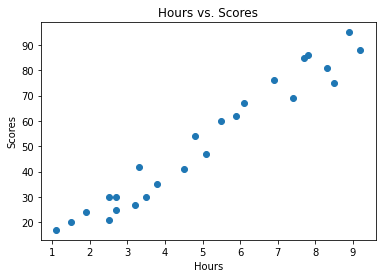

In [ ]:
plt.scatter(x = data['Hours'], y = data['Scores'])
plt.xlabel("Hours",fontsize = 10)
plt.ylabel("Scores",fontsize = 10)
plt.title("Hours vs. Scores")
plt.show()

Dividing the into inputs and outputs

In [ ]:
x = data['Hours']
y = data['Scores']
x = x.values.reshape(-1,1)

Dividing the data into test and train data for predicitng the scores with train dataset and then checking the accuracy with test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now plotting the regression line

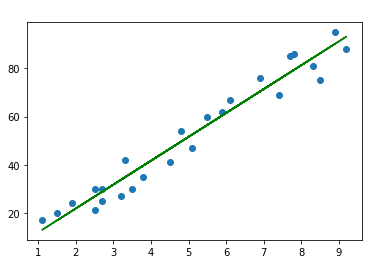

In [ ]:
regline = (reg.coef_*x) + reg.intercept_
plt.plot(x,regline, c = "green")
plt.scatter(x,y)
plt.title("Hours Vs Scores", c = 'white')
plt.show()

Predictions with test data

In [ ]:
y_pred = reg.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing predicted data with Actual data

In [ ]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
# To predict the score of  a student who studies 9.25 hrs/day
hours = np.array(9.25)
hours = hours.reshape(-1,1)
prediction = reg.predict(hours)
print("No. of hours studied = " + str(hours[0]))
print("Percentage of scores predicted = " + str(prediction[0]))

No. of hours studied = [9.25]
Percentage of scores predicted = 93.69173248737539


Evaluating model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
